<div class="alert alert-block" style="background-color: #ffffff; border: 1px solid #333333; border-radius: 10px; padding: 20px; text-align: center;"> <h1 style="font-family: Arial, sans-serif; color: #000000; font-size: 36px;">MACHINE LEARNING</h1> <h2 style="font-family: Arial, sans-serif; color: #333333; font-size: 28px;">MDSAA-BA Program</h2> <hr style="border: 1px solid #555555;"> <h3 style="font-family: 'Open Sans', sans-serif; color: #666666; font-size: 24px;">To Grant Or Not To Grant Project 2024/2025</h3> </div>

# Not forget

- Change floats to integers
- WCIO Part Of Body Code has a value of -9, change it to 9 or not because it means multiple parts of the body
- OIICS Nature of Injury Description, this one does not have values
- using .describe when we have the data scaled just to check
- word clouds for county of injury and others

## Table of contents

1. [Importing Libraries](#1.-Importing-Libraries)
2. [Importing the data](#2.-Importing-the-data)
3. [Exploring the data](#3.-Exploring-the-data)

## 1. Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   
import missingno as msno

<br>

## 2. Importing the data

The `display.max_columns` option controls the number of columns to be printed. By setting the `display.max_columns` option to `None`, Pandas will display all columns in the DataFrame.

In [2]:
# Displays all columns of the dataset
pd.set_option('display.max_columns', None)

In [3]:
train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')
test = pd.read_csv('/Users/mariananeto/Downloads/project_data/test_data.csv')

/var/folders/pw/sbpycr1d17b1j4255gwjl17c0000gn/T/ipykernel_22795/890604039.py:1: DtypeWarning: Columns (29) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv('/Users/mariananeto/Downloads/project_data/train_data.csv')


<br>

## 3. Exploring the data

### **1.3.1**  Applying the `.head()` and `.shape()` method

To take a first look into the data, it is used the method `.head()` method, so that the five first rows of every feature in the dataset is displayed.

In [4]:
train.head()

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


With this method, the first five rows of data are visualized. It thus becomes easier to relate the variables to their respective values. It is, therefore possible to make a few first conclusions about the data, for instance:

- the variable `Claim Identifier` can be set as index;
- there are missing values in the data;
- there are different types of data: categorical (nominal and ordinal) and numerical (discrete and continuous);
- the target variable `Claim Injury Type` is ordinal.

Using the `.shape()` method we can check how many rows and columns the train and test dataset have.

In [5]:
print('The train dataset has ', train.shape[0], ' rows and ', train.shape[1], ' columns.')
print('The dataset with the new examples has ', test.shape[0], ' rows and ', test.shape[1], ' columns.')

The train dataset has  593471  rows and  33  columns.
The dataset with the new examples has  387975  rows and  30  columns.


From the output above, we can see that the train dataset has 593469 rows and 32 columns. While the test dataset has 387975  rows and  29  columns, 3 columns less than the train. This might suggest that the additional columns in the train data are not relevant for prediction.

<br>

### **1.3.2**  Checking duplicate values

#### **1.3.2.1**  Duplicate values in the `Claim Identifier` feature

Before we set the variable `Claim Identifier` as index its important to check first if there is duplicate values in the data. 

These two methods allow us to check if there is duplicated identifiers in the dataset. This is possible, since the `.duplicated()` method provides a list with boolean values for each row, having False if the row is not a duplicate and True otherwise. Then, the `.sum()` method sums all the values contained in that list (as False corresponds to the value 0 and True to the value 1).

In [6]:
print(train['Claim Identifier'].duplicated().sum())

1


There is duplicate values, so it is necessary to check the indexes with the respective duplicate claim identifier, in order to drop one of them.

In [7]:
pd.concat(identifier for _, identifier in train.groupby('Claim Identifier') if len(identifier) > 1)


,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
257901,NaN,NaN,NaN,2021-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292668076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526445,NaN,NaN,NaN,2022-09-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,292668076,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the output above, it is clear that the only different attribute is the `Assembly Date` for the remaining variables there is no information. Therefore, we proceed by deleting both records.

In [8]:
claimMode = train['Claim Identifier'].mode()
claimDateModeIndex = list(train[train['Claim Identifier'] == claimMode[0]].index)
claimDateModeIndex

[257901, 526445]

In [9]:
train.drop(claimDateModeIndex, inplace=True)

To make the use of these datasets more manageable, its index is defined as the feature `Claim Identifier` in the code below. 

In [10]:
train.set_index('Claim Identifier', inplace=True)
test.set_index('Claim Identifier', inplace=True)

<br>

#### **1.3.2.2**  Duplicate records in the dataset

Before proceeding, we check if there is any duplicated rows.

In [11]:
train[train.duplicated() == True]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
363651794,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209507552,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
970865999,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
807753247,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
395971406,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365870975,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
327160035,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249875936,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


From the ouput above, we can see that there is 18348 duplicated rows and it is, also, clear that there exists a lot of rows with missing values in all features, except `Assembly Date`. This missingness in the data is, also, applied to the target variable `Claim Injury Type`. Since no useful information is provided by these rows, we will proceed by removing these observations.

Before proceeding to the removal, we check if there are more rows with missing values in the target variable.

In [12]:
print(f"There are {train[train['Claim Injury Type'].isna()].shape[0]} rows with missing values in the target feature, which corresponds to {round((train['Claim Injury Type'].isna().sum() / len(train)) * 100, 2)}% of the entire dataset.")


There are 19443 rows with missing values in the target feature, which corresponds to 3.28% of the entire dataset.


In [13]:
train.dropna(subset=['Claim Injury Type'], inplace=True)

Let's see if more duplicated rows can be found in the dataset.

In [14]:
train[train.duplicated(keep=False)]

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
Claim Identifier,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5686981,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0
5686771,NaN,0.0,N,2021-03-25,Y,0.0,1968.0,NaN,2021-03-16,ACE AMERICAN INSURANCE CO,1A. PRIVATE,1. CANCELLED,UNKNOWN,N,NYC,2022-10-24,M,NaN,NaN,NaN,UK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,07032,0.0,Not Work Related,0.0


We identified a single duplicated row, differing only in its index. Therefore, we will proceed to delete one of the duplicates.

In [15]:
train.drop_duplicates(keep='first', inplace=True)

<br>

#### **1.3.3** Applying the `.info()` method

The `` .info() `` method provides more information about the dataset, including the existence of missing values and the data type of the elements of each row.

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 574025 entries, 5393875 to 6165075
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574025 non-null  float64
 2   Alternative Dispute Resolution      574025 non-null  object 
 3   Assembly Date                       574025 non-null  object 
 4   Attorney/Representative             574025 non-null  object 
 5   Average Weekly Wage                 545374 non-null  float64
 6   Birth Year                          544947 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187244 non-null  object 
 9   Carrier Name                        574025 non-null  object 
 10  Carrier Type                        574025 non-null  object 
 11  Claim Injury Type       

From the output above we can get some insights: 
- some features have missing values;
- the variable `OIICS Nature of Injury Description` has no values;
- 11 variables are numerical and 21 categorical.

By applying the `.unique()` method on the variable `OIICS Nature of Injury Description` we get all the unique (non-duplicate) values of the column. We do this to confirm the insight taken above, that no values are present.

In [17]:
train["OIICS Nature of Injury Description"].unique()

array([nan])

From the output it is clear the column has missing values. Given the lack of meaningful data in this column, it will be removed from the dataset.

In [18]:
# axis = 1 specifies that we're dropping a column, not rows.
# inplace = True deletes the column without having to reassign `train`.
train.drop("OIICS Nature of Injury Description", axis = 1, inplace = True)

<br>

#### **1.3.4** Descriptive Statistics

By using the `.describe()` method we get different statistical measurements, such as mean and standard deviation, for the various features. By examining these statistics, we can gain insights into the distribution of the data, helping to identify anomalies.

##### 1.3.4.1 Numerical Features

By default, the .describe() method focuses on the numerical features of the dataset. We will begin our analysis with these features to gain insights into their characteristics and distributions.

In [19]:
train.describe()

,Age at Injury,Average Weekly Wage,Birth Year,IME-4 Count,Industry Code,WCIO Cause of Injury Code,WCIO Nature of Injury Code,WCIO Part Of Body Code,Agreement Reached,Number of Dependents
count,574025.000000,5.453740e+05,544947.000000,132803.000000,564068.000000,558386.000000,558369.000000,556944.000000,574025.000000,574025.000000
mean,42.114343,4.910892e+02,1886.767454,3.207337,58.645305,54.381143,41.013839,39.738146,0.046665,3.006564
std,14.256336,6.092924e+03,414.644789,2.832303,19.644175,25.874281,22.207521,22.365940,0.210921,2.000799
min,0.000000,0.000000e+00,0.000000,1.000000,11.000000,1.000000,1.000000,-9.000000,0.000000,0.000000
25%,31.000000,0.000000e+00,1965.000000,1.000000,45.000000,31.000000,16.000000,33.000000,0.000000,1.000000
50%,42.000000,0.000000e+00,1977.000000,2.000000,61.000000,56.000000,49.000000,38.000000,0.000000,3.000000
75%,54.000000,8.410000e+02,1989.000000,4.000000,71.000000,75.000000,52.000000,53.000000,0.000000,5.000000
max,117.000000,2.828079e+06,2018.000000,73.000000,92.000000,99.000000,91.000000,99.000000,1.000000,6.000000


Observations:

- The feature `Age at Injury` has a minimum age of 0 and a maximum age of 117, which is completly impossible. Therefore, these can be considered as inconsistencies in the data;
- The feature `Average Weekly Wage` has a standard deviation of approximatly 6092.92 monetary units which is very dispersed to the mean (491.09 monetary units), this means that there is a wide range in weekly wages, maybe due to outliers. Also, from the median we can see that 50% of the individuals have no salary, maybe because it was never reported when filling the claim. The maximum statistic shows that the maximum average weekly wage is 2828079, this might represent an outlier.
- The feature `Birth Year` suggests that there is a lot of inconsistencies in the year of birth. The mean birth year appears to be 1886.77, which is extremely low, meaning that we would have people with more than 100 years. It, also, has a large standard deviation, due to significant discrepancies in the data. 
- At least 2 IME-4 forms received per claim. From the `IME-4 Count`, we can see that the maximum number of claims received is 73, which can represent an outlier.
- From the feature `Agreement Reached` we can see that most of the agreements were not satisfied.
- On average, individuals have about three dependents, with the maximum being 6.

<br>

##### 1.3.4.2 Categorical Features

Next, we will examine the statistics for the categorical data. To achieve this, we will use the include parameter and set it to object. This will provide a summary that includes the count of entries, the number of unique values, the most frequent value, and the frequency of that top value for each categorical column.

In [20]:
train.describe(include=object)

,Accident Date,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,Industry Code Description,Medical Fee Region,WCIO Cause of Injury Description,WCIO Nature of Injury Description,WCIO Part Of Body Description,Zip Code,WCB Decision
count,570337,574025,574025,574025,559466,187244,574025,574025,574025,574025,574025,574025,150797,574025,564068,574025,558386,558369,556944,545388,574025
unique,5539,3,897,2,2475,1648,2046,8,8,63,2,8,1094,4,20,5,74,56,54,10060,1
top,2020-03-01,N,2020-03-06,N,2021-05-11,2021-04-21,STATE INSURANCE FUND,1A. PRIVATE,2. NON-COMP,SUFFOLK,N,NYC,2022-04-15,M,HEALTH CARE AND SOCIAL ASSISTANCE,IV,LIFTING,STRAIN OR TEAR,LOWER BACK AREA,11236,Not Work Related
freq,1245,571411,1413,392291,1847,350,111144,285367,291078,60430,546504,270778,440,335217,114339,265981,46610,153373,51862,3302,574025


Observations:

- From the feature `Accident Date`, we can check that March 1, 2020 is the most common accident date, occurring 1245 times. This might suggest a possible concentration of injuries around that time; 
- From the feature `Alternative Dispute Resolution`, we can check that the vast majority of cases did not involve alternative dispute resolution (571 412 times); 
- The feature `Attorney/Representative` has 2 unique values, with 'N' (No) as the predominant value (392 291), indicating that many claimants did not have legal representation;
- The most predominant carrier (`Carrier Name`) is `STATE INSURANCE FUND`;
- With 8 unique carrier types (`Carrier Type`), `1A. PRIVATE` is the most frequent (285 368), indicating a prevalence of private insurance providers;
- The target variable (`Claim Injury Type`) has as the predominant claim type `2. NON-COMP`;
- The vast majority of cases were not related to COVID-19;
- Higher incidence of workplace injuries among males (335 218);
- From the `Industry Code Description`, we can check that `HEALTH CARE AND SOCIAL ASSISTANCE` classification is the most common (114 339 times), indicating a high frequency of injuries in this sector.
- `LIFTING` is the most frequently reported cause of injury (153 373 times);
- `STRAIN OR TEAR` is the most frequently reported nature of injury (153 373 times);
- `LOWER BACK AREA` is the most frequently reported injury location (51862 times);
- The `WCB Decision` feature shows only 1 unique value, `Not Work Related`, indicating the same categorization of claims in the data.


<br>

## 3. Data Pre-processing

### 3.1 Coherence Checking

Before splitting the data into training and validation sets and performing further pre-processing steps, such as imputing missing values, we will first check the consistency of the data. Based on previous insights, we have identified potential inconsistencies in some features. For example, there are individuals over 100 years old and babies applying for compensation benefits, which is highly unlikely and suggests data incoherence. Additionally, we may encounter missing values in some columns, as well as the presence of outliers or leverage points, all of which will be analyzed later.

Firstly, the missing values in the data are analysed. Then, we will proceed by analysing inconsistencies in some columns.

<br>

#### 3.1.1 Missing Values

Earlier, we checked that the column `Birth Year` contains some rows with a value of 0. Therefore, we will replace those values with NaN.

In [21]:
print(f"There are {train[train['Birth Year'] == 0].shape[0]} rows with a value of 0 in the 'Birth Year' column.")

There are 25081 rows with a value of 0 in the 'Birth Year' column.


In [22]:
train['Birth Year'] = train['Birth Year'].replace(0, np.nan)

 To analyze missing values in the dataset, we can call the `missing_value_summary` function. This function identifies the columns with missing data, counts the unique values in each column, determines the number of missing values, and calculates the percentage of missing values relative to the entire dataset.

In [23]:
def missing_value_summary(dataframe):
    nan_columns = dataframe.columns[dataframe.isna().any()].tolist()
    
    summary_data = []
    
    for column in nan_columns:

        nan_number = dataframe[column].isna().sum()

        nan_percentage = (nan_number / len(dataframe)) * 100

        unique_values = dataframe[column].nunique()
        
        summary_data.append({
            'Unique Values': unique_values,
            'NaN Values': nan_number,
            'Percentage NaN': nan_percentage
        })
    
    summary = pd.DataFrame(summary_data, index=nan_columns)
    
    return summary


In [24]:
# Calling the 'missing_value_summary' function on the 'train' dataset.
missing_value_summary(train)


,Unique Values,NaN Values,Percentage NaN
Accident Date,5539,3688,0.642481
Average Weekly Wage,120024,28651,4.991246
Birth Year,106,54159,9.434955
C-2 Date,2475,14559,2.536301
C-3 Date,1648,386781,67.380515
First Hearing Date,1094,423228,73.729890
IME-4 Count,41,441222,76.864596
Industry Code,24,9957,1.734593
Industry Code Description,20,9957,1.734593
WCIO Cause of Injury Code,77,15639,2.724446


Columns such as `First Hearing Date` (73.73% missing), `IME-4 Count` (76.86%), and `C-3 Date` (67.38%) exhibit high percentages of missing data. In contrast, `Industry Code` and `Industry Code Description` exhibit lower percentages of missing values (1.73%). It is evident that whenever a code is missing, the corresponding description is also absent. Further analysis will be conduct to explore the relationships between missing values across column pairs.


Overall, the presence of missing data in these columns suggests a need for data imputation strategies. However, this step will only be done after the splitting of the data, in order to avoid data leakage.

We can visualize and analyse missing values by using the library `missingno`. This library provides different visualizations, such as heatmaps and dendograms, that help us in identifying and understanding patterns of missingness in data.

1. `Missingno` Bar Chart

Below we have plotted the count of values per column, organized in ascending order. This means that columns with the lowest values are positioned at the beginning, followed by those with higher counts.

<Axes: >

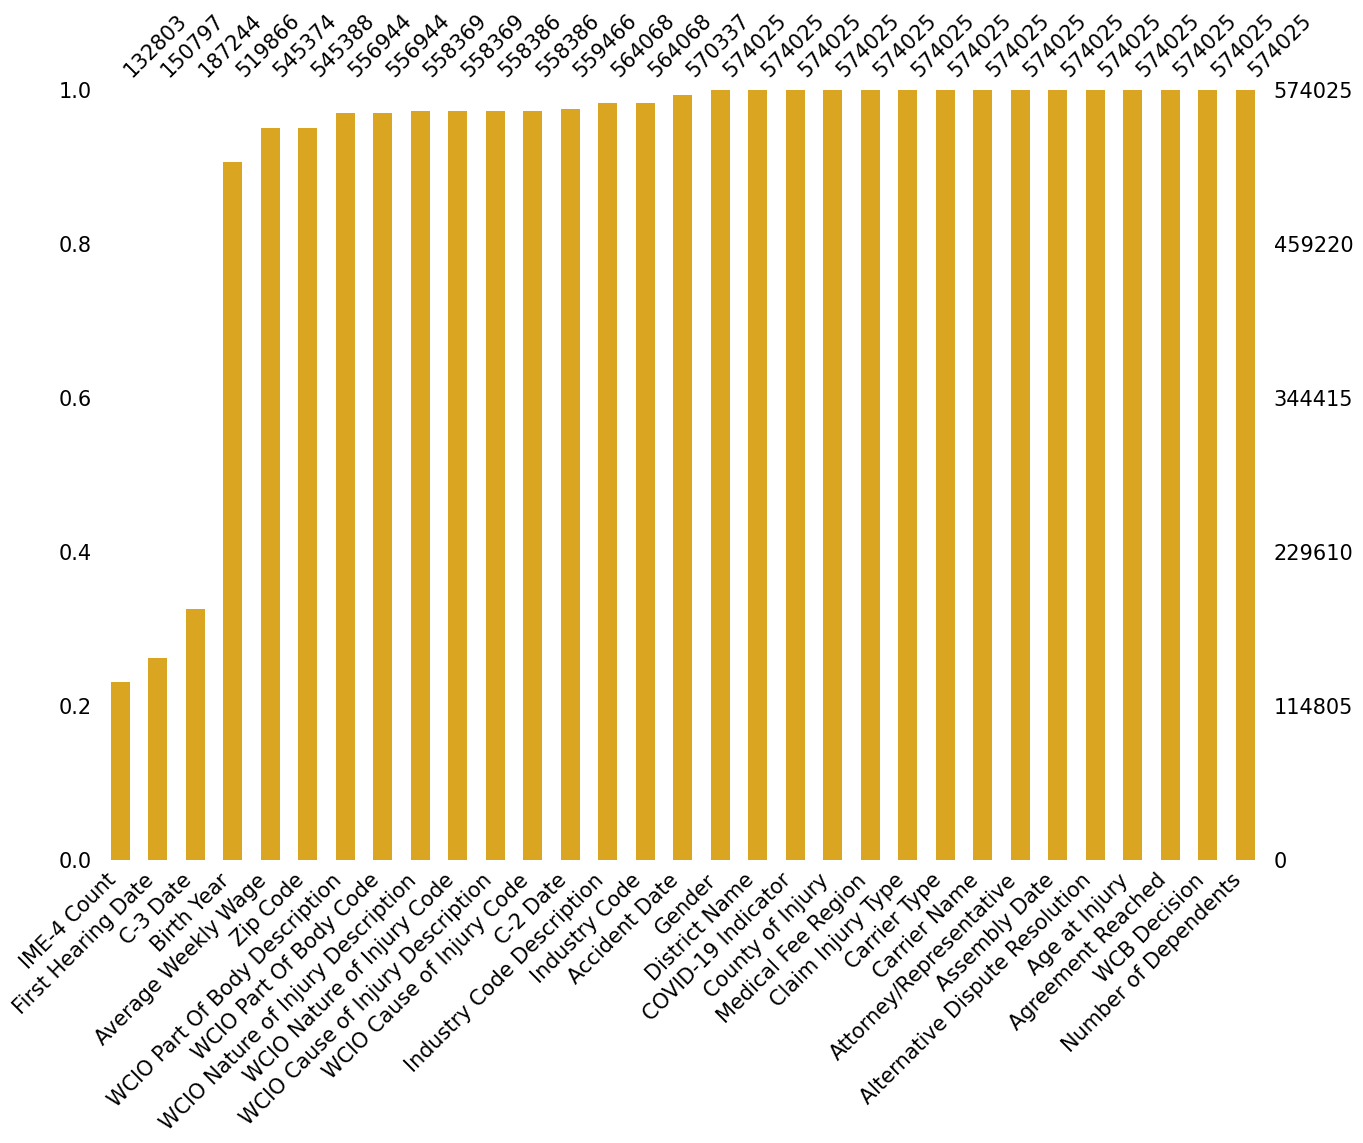

In [25]:
msno.bar(train, figsize=(15, 10), fontsize=15, color="goldenrod", sort="ascending")

2. `Missingno` Heatmap visualization

We can also use the `missingno` library to explore the relationships between missing values across column pairs. By analyzing the nullity correlation, we can identify columns whose missing data are either directly or inversely related. In this analysis, only columns with missing values are considered.

A nullity correlation value close to 1 indicates a strong positive relationship, meaning that if one column has a missing value, the other is likely to have one as well. On the other hand, a correlation value near -1 suggests a strong inverse relationship, where one column is missing values while the other is not. Values around zero indicate no significant correlation between the missing data in the two columns.

<Axes: >

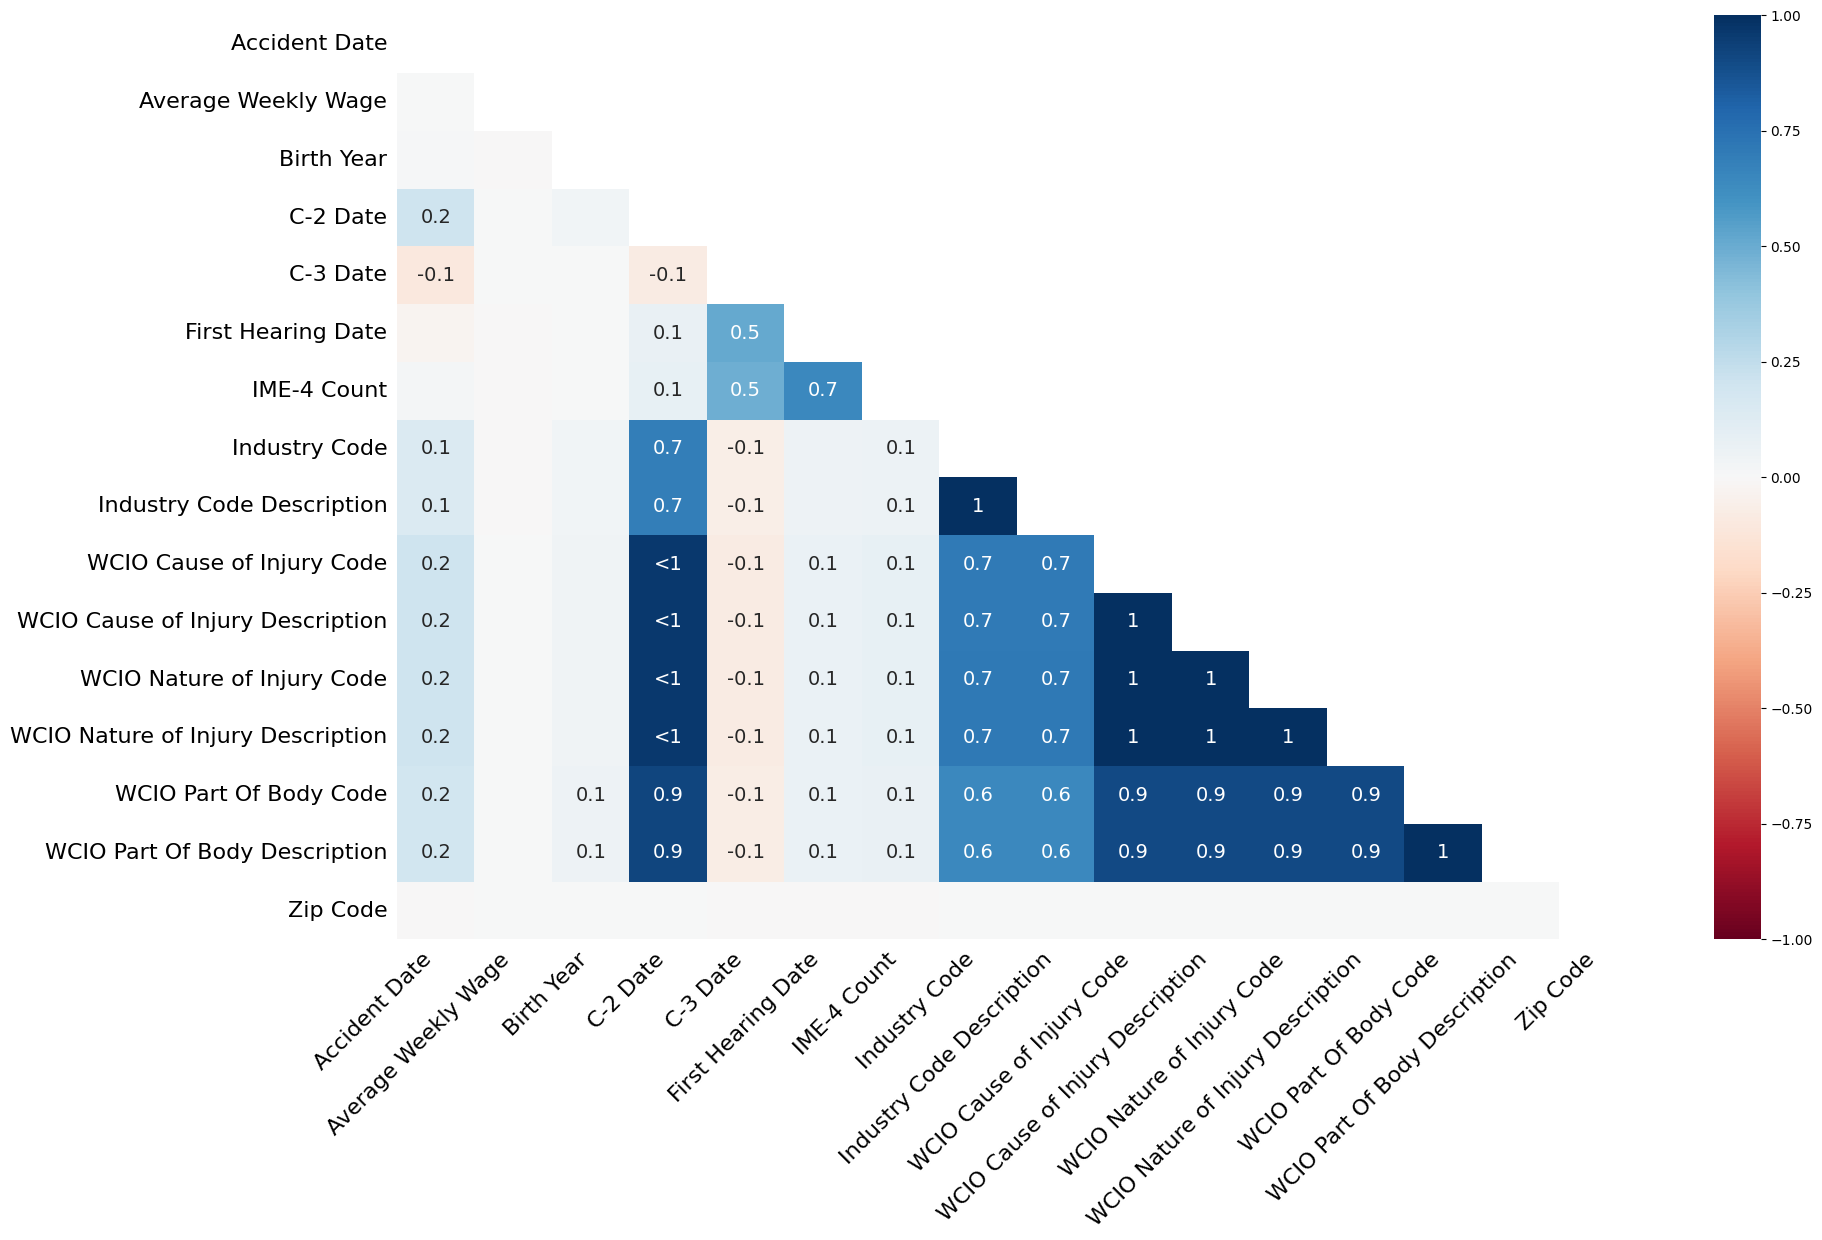

In [26]:
msno.heatmap(train)

Correlations:

- WCIO related codes (Cause of Injury, Nature of Injury, Part of Body) and their descriptions show perfect correlations (value of 1). This indicates that if data is missing in one of these fields, it is also missing in the corresponding description fields - Missing Not At Random (MNAR); 

- `Industry Code` and `Industry Code Description` also show a strong positive correlation of 1 - Missing Not At Random (MNAR);

- `Industry Code` and `Industry Code Description` have a strong positive correlation with all WCIO related codes and descriptions, 0.7 and 0.6 for the Part of Body code and description;

- 'C-2 Date' has a very strong correlation, near 1, with all WCIO related codes and description. It also has with 'Industry Code' and 'Industry Code Description' a correlation of 0.7;

- Some features like 'Average Weekly Wage', 'Birth Year' and 'Zip Code' have very weak correlations (close to zero), indicating they are missing independently of other variables - Missing Completely at Random (MCAR);

- 'First Hearing Date', 'IME-4 Count' and 'C-3 Date' have strong correlation with most variables, some positive others negative. However, from the previous analysis we saw that these variables have the highest number of missing values, hence these correlations might be trivial.

<br>

#### 3.1.2 Inconsistent Values

##### 3.1.2.1 `Age at Injury`

In [35]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, show
import numpy as np

output_notebook()

hist, edges = np.histogram(train["Age at Injury"], bins=40)

p = figure(title="Histogram of Age at Injury")

p.quad(
    top=hist,
    bottom=0,
    left=edges[:-1],
    right=edges[1:],
    fill_color="#FF8C00",
    line_color="black",      
    line_width=1 
)

# Display the plot in the notebook
show(p)


Loading BokehJS ...

In a previous analysis, we identified some inconsistencies in the 'Age at Injury' column, where certain values did not seem to make sense. The histogram above shows the distribution of ages, revealing that some individuals are reported to be younger than 15 or older than 90. These values are considered inconsistent, as it is unlikely that people within these age ranges would be actively working.

<br>

##### 3.1.2.2 `Accident Date`

In [32]:
train[['Accident Year', 'Accident Month', 'Accident Day']] = train['Accident Date'].str.split('-', expand=True)


In [45]:
train = train.drop(columns = 'Accident Date')

In [33]:
(train['Accident Year'].astype('Int64') - train['Birth Year'] - train['Age at Injury']).value_counts()

 0.0       273325
 1.0       242970
 1991.0       608
 1965.0       581
 1963.0       567
 1990.0       562
 1964.0       560
 1966.0       558
 1989.0       549
 2020.0       536
 1992.0       532
 1988.0       531
 1993.0       528
 1987.0       526
 1995.0       524
 1994.0       520
 1968.0       519
 1971.0       518
 1969.0       518
 1967.0       517
 1962.0       511
 1984.0       510
 1961.0       509
 1970.0       508
 1985.0       497
 1983.0       491
 1972.0       481
 1998.0       478
 1996.0       476
 1986.0       472
 1981.0       470
 1973.0       469
 1979.0       466
 1975.0       461
 1960.0       452
 1980.0       450
 1982.0       442
 1959.0       439
 1977.0       437
 1997.0       434
 1978.0       428
 1976.0       414
 1999.0       406
 1974.0       404
 2021.0       387
 1958.0       365
 2000.0       328
 2001.0       296
-1.0          294
 1957.0       285
 2022.0       266
 1956.0       229
 2002.0       219
 1955.0       178
 1954.0       149
 2019.0   

In [34]:
train['Accident Year'] = train['Accident Year'].astype('Int64')
train['Accident Month'] = train['Accident Month'].astype('Int64')
train['Accident Day'] = train['Accident Day'].astype('Int64')

In [35]:
train['Accident Year'].describe()

count       570337.0
mean     2020.827849
std         1.862189
min           1961.0
25%           2020.0
50%           2021.0
75%           2022.0
max           2023.0
Name: Accident Year, dtype: Float64

we have inconsistencies in the dates, but the accindent years seem ok so we take the as good

we wil descide who is worse in the feature selection

In [36]:
train['Age at Injury'].describe()

count    574026.000000
mean         42.114270
std          14.256432
min           0.000000
25%          31.000000
50%          42.000000
75%          54.000000
max         117.000000
Name: Age at Injury, dtype: float64

In [37]:
(train [train['Age at Injury'] == 0] ['Birth Year'] - train [train['Age at Injury'] == 0] ['Accident Year']).value_counts()

-2020.0    536
-2021.0    387
-2022.0    266
-2019.0    144
-119.0      84
-2018.0     49
-2016.0     19
-2017.0     16
-1999.0     13
-2001.0     10
-1995.0      9
-1997.0      8
-2005.0      8
-2011.0      7
-118.0       7
-1998.0      7
-2006.0      7
-2002.0      6
-2013.0      6
-1991.0      6
-2015.0      6
-2000.0      5
-1994.0      5
-1990.0      5
-1987.0      5
-2010.0      5
-1993.0      5
-1988.0      4
-2012.0      4
-1996.0      4
-2004.0      4
-2008.0      3
-1984.0      3
-1980.0      3
-2009.0      3
-1981.0      3
-1972.0      2
-2003.0      2
-2007.0      2
-1977.0      2
-1982.0      2
-1985.0      2
-1975.0      2
-1973.0      2
-1992.0      2
-120.0       2
-1983.0      2
-1989.0      1
-1970.0      1
-1976.0      1
-1978.0      1
-2014.0      1
-1974.0      1
-1967.0      1
Name: count, dtype: Int64

<br>

##### 3.1.2.3 `Claim Injury Type`

In [38]:
train["Claim Injury Type"].unique()

array(['2. NON-COMP', '4. TEMPORARY', '3. MED ONLY', '5. PPD SCH LOSS',
       '6. PPD NSL', '1. CANCELLED', '8. DEATH', '7. PTD'], dtype=object)

In [39]:
train[['Injury Magnitude', 'Injury Type']] = train["Claim Injury Type"].str.split('.', expand=True)


In [40]:
train['Injury Magnitude'].describe()

count     574026
unique         8
top            2
freq      291078
Name: Injury Magnitude, dtype: object

In [41]:
train['Injury Magnitude'] = train['Injury Magnitude'].astype('Int64')

In [42]:
ClaimInjuryLookup = train[['Injury Magnitude', 'Injury Type']].drop_duplicates()

In [43]:
ClaimInjuryLookup.reset_index(drop=True)

,Injury Magnitude,Injury Type
0,2,NON-COMP
1,4,TEMPORARY
2,3,MED ONLY
3,5,PPD SCH LOSS
4,6,PPD NSL
5,1,CANCELLED
6,8,DEATH
7,7,PTD


In [44]:
train = train.drop(columns=['Injury Type', 'Claim Injury Type'])


In [46]:
train.columns

Index(['Age at Injury', 'Alternative Dispute Resolution', 'Assembly Date',
       'Attorney/Representative', 'Average Weekly Wage', 'Birth Year',
       'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Agreement Reached', 'WCB Decision', 'Number of Dependents',
       'Accident Year', 'Accident Month', 'Accident Day', 'Injury Magnitude'],
      dtype='object')

<br>

##### 3.1.2.4 `Average Weekly Wage`

In [47]:
train['Average Weekly Wage'].describe()

count    5.453750e+05
mean     4.910883e+02
std      6.092918e+03
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      8.410000e+02
max      2.828079e+06
Name: Average Weekly Wage, dtype: float64

In [49]:
train['Log Average Weekly Wage'] = np.log10(train['Average Weekly Wage'] + 1 )


since the valuesa have a high order of magnitude, we take the logarithm to expressse dem in a a more understendable scale.
we add 1 to the whole column to avode the log(0) error, it's a negligable shift when taking the log of big numbers

In [50]:
train['Log Average Weekly Wage'].describe()

count    545375.000000
mean          1.158955
std           1.474437
min           0.000000
25%           0.000000
50%           0.000000
75%           2.925312
max           6.451492
Name: Log Average Weekly Wage, dtype: float64

<Axes: xlabel='Log Average Weekly Wage', ylabel='Count'>

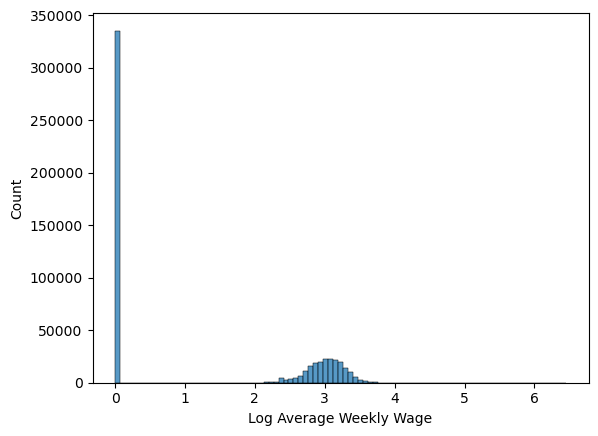

In [51]:
sns.histplot(train['Log Average Weekly Wage'])

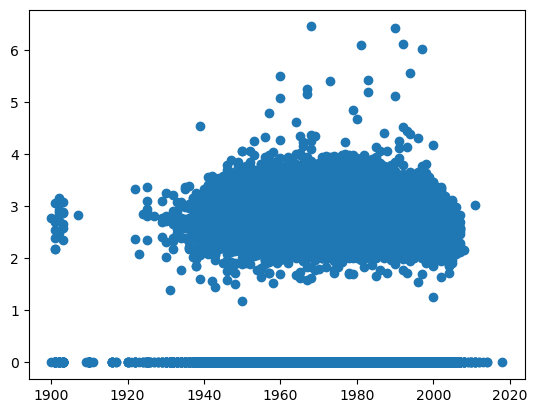

In [55]:
plt.scatter( train['Birth Year'],train['Log Average Weekly Wage'])

this is a bit fishy, let's see in the cross validation how useful this data are

<br>

##### 3.1.2.5 WCIO codes

#### 3.1.5.1 WCIO Cause Of Injury

In [77]:
WCIO_cause_Lookup = train[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates()
WCIO_cause_Lookup = WCIO_cause_Lookup.reset_index(drop=True)
WCIO_cause_Lookup['WCIO Cause of Injury Code'] =  WCIO_cause_Lookup['WCIO Cause of Injury Code'].astype('Int64')
int(WCIO_cause_Lookup.value_counts().max()) == 1

True

In [78]:
train = train.drop(columns=['WCIO Cause of Injury Description'])


#### 3.1.5.1 WCIO Nature Of Injury

In [79]:
WCIO_nature_Lookup = train[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates()
WCIO_nature_Lookup = WCIO_nature_Lookup.reset_index(drop=True)
WCIO_nature_Lookup['WCIO Nature of Injury Code'] =  WCIO_nature_Lookup['WCIO Nature of Injury Code'].astype('Int64')
int(WCIO_cause_Lookup.value_counts().max()) == 1

True

In [71]:
WCIO_nature_Lookup

,WCIO Nature of Injury Code,WCIO Nature of Injury Description
0,10,CONTUSION
1,49,SPRAIN OR TEAR
2,7,CONCUSSION
3,43,PUNCTURE
4,40,LACERATION
5,71,"ALL OTHER OCCUPATIONAL DISEASE INJURY, NOC"
6,59,"ALL OTHER SPECIFIC INJURIES, NOC"
7,37,INFLAMMATION
8,4,BURN
9,52,STRAIN OR TEAR


In [80]:
train = train.drop(columns=['WCIO Nature of Injury Description'])


#### 3.1.5.1 WCIO Part of Body 

In [81]:
WCIO_bodyPart_Lookup = train[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates()
WCIO_bodyPart_Lookup = WCIO_bodyPart_Lookup.reset_index(drop=True)
WCIO_bodyPart_Lookup['WCIO Part Of Body Code'] =  WCIO_bodyPart_Lookup['WCIO Part Of Body Code'].astype('Int64')
int(WCIO_bodyPart_Lookup.value_counts().max()) == 1

True

In [76]:
WCIO_bodyPart_Lookup

,WCIO Part Of Body Code,WCIO Part Of Body Description
0,62,BUTTOCKS
1,38,SHOULDER(S)
2,10,MULTIPLE HEAD INJURY
3,36,FINGER(S)
4,60,LUNGS
5,14,EYE(S)
6,55,ANKLE
7,53,KNEE
8,37,THUMB
9,42,LOWER BACK AREA


In [82]:
train = train.drop(columns=['WCIO Part Of Body Description'])

# Target  Definition

the target is the ingury type, described as a number that goes between 1 and 8

note:
would be nice to kno if a discrete approach is better tha a regression (treating our y as ordinal or not)

In [83]:
y = train['Injury Magnitude']

In [87]:
x = train.drop(columns= 'Injury Magnitude')

<Axes: xlabel='Injury Magnitude', ylabel='Count'>

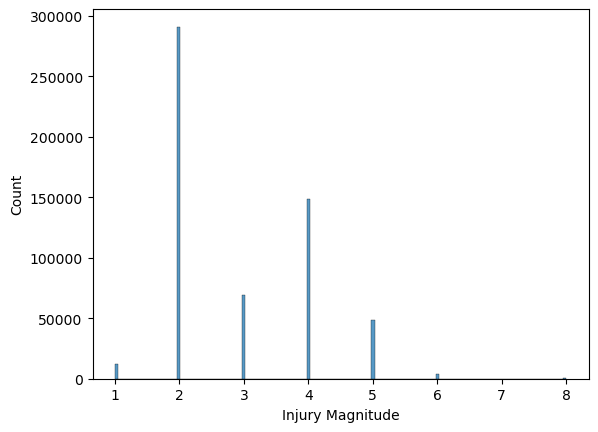

In [88]:
sns.histplot(y)

In [89]:
from sklearn.model_selection import train_test_split

In [90]:
?train_test_split

Signature:
train_test_split(
    *arrays,
    test_size=None,
    train_size=None,
    random_state=None,
    shuffle=True,
    stratify=None,
)
Docstring:
Split arrays or matrices into random train and test subsets.

Quick utility that wraps input validation,
``next(ShuffleSplit().split(X, y))``, and application to input data
into a single call for splitting (and optionally subsampling) data into a
one-liner.

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
*arrays : sequence of indexables with same length / shape[0]
    Allowed inputs are lists, numpy arrays, scipy-sparse
    matrices or pandas dataframes.

test_size : float or int, default=None
    If float, should be between 0.0 and 1.0 and represent the proportion
    of the dataset to include in the test split. If int, represents the
    absolute number of test samples. If None, the value is set to the
    complement of the train size. If ``train_size`` is also None, it will
    be set to 0.25.

trai

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify = y.unique, test_size= 0.2,shuffle=True)

<Axes: xlabel='Injury Magnitude', ylabel='Count'>

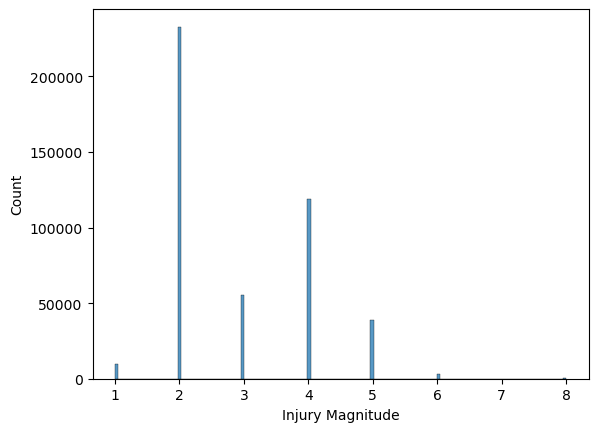

In [94]:
sns.histplot(y_train)

# These codes need to be after train-test split

In [22]:
# create list of numerical column

train['Age'] = 2024 - train['Birth Year']
num_col = train.select_dtypes(include=np.number).columns


In [ ]:
train["IME-4 Count"].unique()

array([nan,  4.,  1.,  3.,  2.,  6.,  7.,  5., 10., 12.,  8.,  9., 11.,
       13., 14., 36., 15., 20., 19., 18., 27., 17., 16., 24., 22., 26.,
       21., 23., 30., 32., 39., 25., 29., 47., 48., 34., 28., 37., 31.,
       35., 33., 73.])

Assuming that the missing values in ÌME-4 Count` means 0 claims received.

In [ ]:
# Assuming you already have the 'train' DataFrame loaded
train["IME-4 Count"].fillna(0, inplace=True)


/var/folders/n8/08b2nd114jdfnsydb_4mj4fw0000gn/T/ipykernel_18366/4151862049.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train["IME-4 Count"].fillna(0, inplace=True)
